This python jupyter notebook contains code to load, process, clean, analyse, visualise and apply machine learning method for the dataset from Apple streaming platform with key components like highest voted movie from IMDB, countries the particular movie is available and the year it was released in.
Machine Learning methods applied in this dataset include Regression techniques like Random Forest Regressor and Decision Tree Regressor. The predicted values from the 2 models are further evaluated using statistical error metrics.

In [79]:
import pandas as pd
import numpy as np
import pycountry
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [80]:
pwd

'C:\\Users\\trini\\DMML_project\\codes'

In [81]:
org_data = pd.read_csv("C:\\Users\\trini\\DMML_project\\Datasets\\apple_data.csv", dtype=object)
org_data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112543,DE
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2315370,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941,tt0033467,8.3,472975,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927,tt0017136,8.3,189469,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221385,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
14563,NaN,tv,Documentary,2020,NaN,NaN,NaN,GB
14564,NaN,tv,NaN,1971,NaN,NaN,NaN,"CA, US"
14565,NaN,tv,Documentary,2023,NaN,NaN,NaN,US
14566,NaN,tv,NaN,2019,NaN,NaN,NaN,US


In [82]:
org_data.dtypes

title                 object
type                  object
genres                object
releaseYear           object
imdbId                object
imdbAverageRating     object
imdbNumVotes          object
availableCountries    object
dtype: object

In [83]:
# copying the original data
na_data=org_data.copy()
na_data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112543,DE
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2315370,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941,tt0033467,8.3,472975,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927,tt0017136,8.3,189469,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221385,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
14563,NaN,tv,Documentary,2020,NaN,NaN,NaN,GB
14564,NaN,tv,NaN,1971,NaN,NaN,NaN,"CA, US"
14565,NaN,tv,Documentary,2023,NaN,NaN,NaN,US
14566,NaN,tv,NaN,2019,NaN,NaN,NaN,US


In [84]:
# check for null values
na_data.isnull().sum()

title                  507
type                     0
genres                 439
releaseYear             23
imdbId                 846
imdbAverageRating     1075
imdbNumVotes          1075
availableCountries       0
dtype: int64

In [85]:
# drop the duplicated rows
na_data.drop_duplicates(inplace=True, ignore_index=True)
na_data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112543,DE
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2315370,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941,tt0033467,8.3,472975,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927,tt0017136,8.3,189469,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221385,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
14375,NaN,tv,"Crime, Documentary",2024,NaN,NaN,NaN,"CA, US"
14376,NaN,tv,NaN,2024,NaN,NaN,NaN,"CA, US"
14377,NaN,tv,Documentary,2020,NaN,NaN,NaN,GB
14378,NaN,tv,NaN,1971,NaN,NaN,NaN,"CA, US"


In [86]:
# drop the rows with null values
na_data=na_data.dropna(ignore_index=True)
na_data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112543,DE
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2315370,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941,tt0033467,8.3,472975,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927,tt0017136,8.3,189469,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221385,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,Crime,2024,tt33303855,7.1,72,"AU, CA, US"
13418,The Summit,tv,Adventure,2024,tt32869199,6.1,130,US
13419,We Three Queens,tv,"Comedy, Drama",2023,tt28637873,7.4,29,"CA, US"
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,Documentary,2024,tt33210825,7.7,352,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO..."


In [87]:
#null values after the drop
na_data.isnull().sum()

title                 0
type                  0
genres                0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

In [88]:
# drop not-required column
na_data.drop(columns="imdbId", inplace=True)
na_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,6.7,112543,DE
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,2315370,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941,8.3,472975,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,189469,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221385,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,Crime,2024,7.1,72,"AU, CA, US"
13418,The Summit,tv,Adventure,2024,6.1,130,US
13419,We Three Queens,tv,"Comedy, Drama",2023,7.4,29,"CA, US"
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,Documentary,2024,7.7,352,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO..."


In [89]:
# display the column names
na_data.columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

In [90]:
# get a quick summary of the dataset
na_data.describe()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
count,13422,13422,13422,13422,13422,13422,13422
unique,13012,2,661,104,79,7483,289
top,Teenage Mutant Ninja Turtles,movie,Drama,2019,6.5,19,US
freq,4,9967,1139,764,504,43,4822


In [91]:
# display the unique values in genres col
all_genres = set(genre.strip() for genres in na_data['genres'] for genre in genres.split(','))
print(all_genres, sep=',')

{'Talk-Show', 'Comedy', 'Game-Show', 'Horror', 'Mystery', 'News', 'Thriller', 'Action', 'Crime', 'Documentary', 'Short', 'Musical', 'Drama', 'Reality-TV', 'Sci-Fi', 'Sport', 'Fantasy', 'Family', 'Reality', 'Western', 'Romance', 'Music', 'Film-Noir', 'War', 'Animation', 'Adventure', 'History', 'TV Movie', 'Biography', 'Soap'}


In [92]:
# create a series obj with col "availableCountries"
avail_count_df = na_data["availableCountries"]
avail_count_df.reset_index(drop=True)
type(avail_count_df)

pandas.core.series.Series

In [93]:
# converting the series object to dataframe
avail_count_df = pd.DataFrame(avail_count_df)
avail_count_df.reset_index(drop= True)

,availableCountries
0,DE
1,"AU, CA, DE, US"
2,"DE, GB"
3,GB
4,"BR, CL, CO, MX"
...,...
13417,"AU, CA, US"
13418,US
13419,"CA, US"
13420,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO..."


In [94]:
# display the unique values in availableCountries column
all_countries = na_data["availableCountries"]
# all_countries
uniq_countries = set(c.strip() for country in all_countries for c in country.split(','))
print(", ".join(uniq_countries))

QA, HU, NO, AR, CO, MD, CL, DE, ID, IL, MU, GR, SA, HN, GH, PT, KR, FI, FJ, TT, BG, BH, UA, US, NI, IE, EC, JO, LB, HK, AE, RU, ZA, DK, PL, OM, BY, IT, GT, AZ, CY, PY, AG, VE, AU, SI, SV, IN, LV, CR, FR, ES, BZ, LU, LT, MY, NZ, PE, SK, BE, CZ, CV, UG, TH, SG, PA, CA, NL, BR, BS, AT, TW, MT, BM, MX, GB, DO, EE, EG, PH, MZ, CH, BO, JP, SE


In [95]:
# Function to convert country code to country name
def country_name(count_df):
    country_names = []
    for code in count_df.split(', '):  # Split the codes by comma
        try:
            country = pycountry.countries.get(alpha_2=code.strip())  # Get country by alpha-2 code
            if country:
                country_names.append(country.name)
            else:
                country_names.append(code.strip())  # If country is not found, retain the code
        except AttributeError:
            country_names.append(code.strip())  # In case of error, append the code
    return ', '.join(country_names)  # Join the country names back into a single string

# Apply the function to the 'availableCountries' column
avail_count_df['country_code'] = avail_count_df['availableCountries'].apply(country_name)

# Display the updated DataFrame
avail_count_df.reset_index(drop=True)

,availableCountries,country_code
0,DE,Germany
1,"AU, CA, DE, US","Australia, Canada, Germany, United States"
2,"DE, GB","Germany, United Kingdom"
3,GB,United Kingdom
4,"BR, CL, CO, MX","Brazil, Chile, Colombia, Mexico"
...,...,...
13417,"AU, CA, US","Australia, Canada, United States"
13418,US,United States
13419,"CA, US","Canada, United States"
13420,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO...","Argentina, Austria, Australia, Bolivia, Plurin..."


In [96]:
# replacing the country name column 
na_data["availableCountries"] = avail_count_df['country_code']
na_data.reset_index(drop=True)

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,6.7,112543,Germany
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,2315370,"Australia, Canada, Germany, United States"
2,Citizen Kane,movie,"Drama, Mystery",1941,8.3,472975,"Germany, United Kingdom"
3,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,189469,United Kingdom
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221385,"Brazil, Chile, Colombia, Mexico"
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,Crime,2024,7.1,72,"Australia, Canada, United States"
13418,The Summit,tv,Adventure,2024,6.1,130,United States
13419,We Three Queens,tv,"Comedy, Drama",2023,7.4,29,"Canada, United States"
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,Documentary,2024,7.7,352,"Argentina, Austria, Australia, Bolivia, Plurin..."


In [97]:
# check the datatypes after newly replacing the column "availableCountries"
na_data.dtypes

title                 object
type                  object
genres                object
releaseYear           object
imdbAverageRating     object
imdbNumVotes          object
availableCountries    object
dtype: object

In [98]:
# categorizing the columns namely genres and availableCountries to bool values for easier and simpler analysis.
cols = ["genres", "availableCountries"]
cat_data = pd.DataFrame()
for col in cols:
    if col == "genres":
        # converting the genre column values to 1 if the genre in a 
        cat_data[col] = [1 if len(i.split(',')) > 2 else 0 for i in na_data[col]]
    else:  
        cat_data[col] = [1 if len(i.split(',')) > 3 else 0 for i in na_data[col]]
cat_data

,genres,availableCountries
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
13417,0,0
13418,0,0
13419,0,0
13420,0,1


1 Genere_vals > 2 ; 1 availableCountries_vals > 3.

In [99]:
# counting the number of genre
cat_data["genres"].value_counts()

genres
0    7572
1    5850
Name: count, dtype: int64

In [100]:
# updating cat-converted columns in the original dataset
na_data["genres"], na_data["availableCountries"] =cat_data["genres"],cat_data["availableCountries"]
na_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,0,1995,6.7,112543,0
1,Forrest Gump,movie,0,1994,8.8,2315370,1
2,Citizen Kane,movie,0,1941,8.3,472975,0
3,Metropolis,movie,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,movie,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,0,2024,7.1,72,0
13418,The Summit,tv,0,2024,6.1,130,0
13419,We Three Queens,tv,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,0,2024,7.7,352,1


In [101]:
cl_data=na_data.copy()
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,0,1995,6.7,112543,0
1,Forrest Gump,movie,0,1994,8.8,2315370,1
2,Citizen Kane,movie,0,1941,8.3,472975,0
3,Metropolis,movie,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,movie,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,0,2024,7.1,72,0
13418,The Summit,tv,0,2024,6.1,130,0
13419,We Three Queens,tv,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,0,2024,7.7,352,1


In [102]:
cl_data.isnull().sum()

title                 0
type                  0
genres                0
releaseYear           0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

In [103]:
print(f"Movies listed from year {cl_data["releaseYear"].min()} to {cl_data["releaseYear"].max()}")

Movies listed from year 1902 to 2024


In [104]:
# finding which type of entertainment secured the highest number of IMDB votes
print(f"IMDB least rating is {cl_data["imdbAverageRating"].min()} and highest rating is {cl_data["imdbAverageRating"].max()}")

IMDB least rating is 1.3 and highest rating is 9.4


In [105]:
# printing the unique values from column "type"
type_vals = cl_data["type"].values
type_vals
t_val = set([v.strip() for val in type_vals for v in val.split(',')])
t_val

{'movie', 'tv'}

In [106]:
# analysis between type and number of IMDB votes
# creating a df only with the 2 columns
type_votes = pd.DataFrame()
type_votes["type"],type_votes["imdbNumVotes"] = cl_data["type"],cl_data["imdbNumVotes"]
type_votes

,type,imdbNumVotes
0,movie,112543
1,movie,2315370
2,movie,472975
3,movie,189469
4,movie,1221385
...,...,...
13417,tv,72
13418,tv,130
13419,tv,29
13420,tv,352


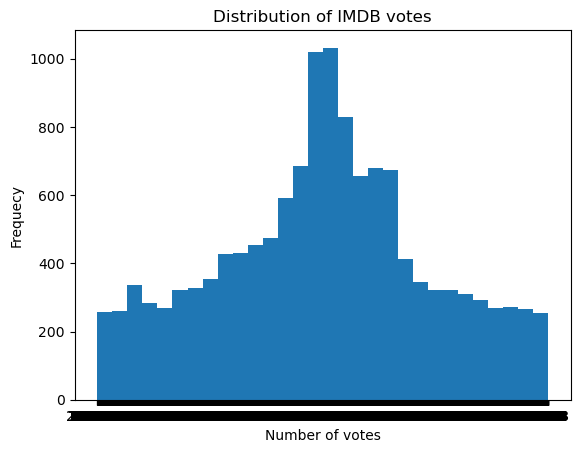

In [69]:
# plt.figure(figsize=(8,8))
plt.hist(type_votes["imdbNumVotes"], bins=30)
plt.title("Distribution of IMDB votes")
plt.xlabel("Number of votes")
plt.ylabel("Frequecy")
plt.show()

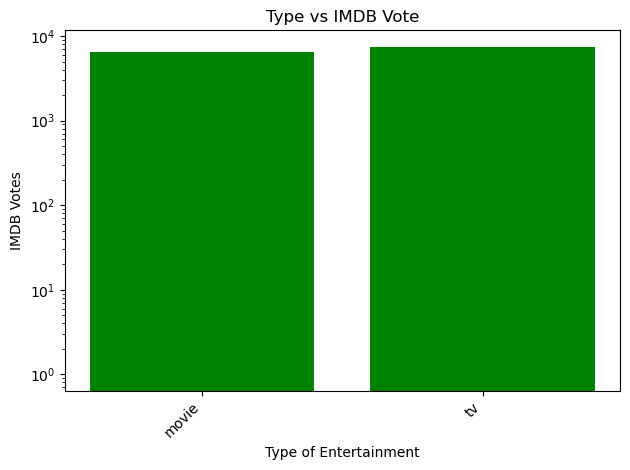

In [77]:
import matplotlib.pyplot as plt

plt.bar(type_votes['type'], type_votes['imdbNumVotes'], color="green")
plt.xlabel("Type of Entertainment")
plt.ylabel("IMDB Votes")
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.title("Type vs IMDB Vote")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [107]:
# counting number of values for each type 
type_votes["type"].value_counts()

type
movie    9967
tv       3455
Name: count, dtype: int64

In [108]:
# grouping the df values based on type, then applying sum() 
type_votes_grp=type_votes.groupby("type")["imdbNumVotes"].sum()
type_votes_grp

type
movie    1125432315370472975189469122138572418044363811...
tv       5751981839281073167315143294541821651121754940...
Name: imdbNumVotes, dtype: object

In [109]:
# since the above method treats the votes as string, it shows the concatenated values hence converting into numeric val
type_votes["imdbNumVotes"] = pd.to_numeric(type_votes["imdbNumVotes"])
type_votes

,type,imdbNumVotes
0,movie,112543
1,movie,2315370
2,movie,472975
3,movie,189469
4,movie,1221385
...,...,...
13417,tv,72
13418,tv,130
13419,tv,29
13420,tv,352


In [110]:
# performing grouping now
type_votes_grp=type_votes.groupby("type")["imdbNumVotes"].sum()
type_votes_grp

type
movie    376366612
tv        30282067
Name: imdbNumVotes, dtype: int64

From the above results, we infer that entertainment type "movie" has secured maximum IMDB votes

In [111]:
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,0,1995,6.7,112543,0
1,Forrest Gump,movie,0,1994,8.8,2315370,1
2,Citizen Kane,movie,0,1941,8.3,472975,0
3,Metropolis,movie,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,movie,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,0,2024,7.1,72,0
13418,The Summit,tv,0,2024,6.1,130,0
13419,We Three Queens,tv,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,0,2024,7.7,352,1


In [112]:
# relationship between type and imdbAverageRating
type_rating=cl_data.groupby("type")["imdbAverageRating"].sum()
type_rating

type
movie    6.78.88.38.38.28.48.28.3887.98.17.76.56.15.88....
tv       5.87.37.98.57.16.66.38.14.38.38.48.47.45.587.9...
Name: imdbAverageRating, dtype: object

In [113]:
cl_data["imdbAverageRating"].dtype

dtype('O')

In [114]:
# since the above operation yields concatenated values, converting that col into numeric type
cl_data["imdbAverageRating"]=pd.to_numeric(cl_data["imdbAverageRating"])
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,0,1995,6.7,112543,0
1,Forrest Gump,movie,0,1994,8.8,2315370,1
2,Citizen Kane,movie,0,1941,8.3,472975,0
3,Metropolis,movie,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,movie,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,0,2024,7.1,72,0
13418,The Summit,tv,0,2024,6.1,130,0
13419,We Three Queens,tv,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,0,2024,7.7,352,1


In [115]:
cl_data["imdbAverageRating"].dtype

dtype('float64')

In [116]:
# grouping the dataset by type and taking mean of imdbAverageRating
type_rate = cl_data.groupby("type")["imdbAverageRating"].mean()
type_rate

type
movie    6.224511
tv       7.125731
Name: imdbAverageRating, dtype: float64

From the above results, we infer that the IMDB rating is high for the entertainment type "tv"

In [117]:
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,0,1995,6.7,112543,0
1,Forrest Gump,movie,0,1994,8.8,2315370,1
2,Citizen Kane,movie,0,1941,8.3,472975,0
3,Metropolis,movie,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,movie,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,tv,0,2024,7.1,72,0
13418,The Summit,tv,0,2024,6.1,130,0
13419,We Three Queens,tv,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,tv,0,2024,7.7,352,1


In [118]:
# retrieivng the value from title column
titles = cl_data["title"].values
titles

array(['Four Rooms', 'Forrest Gump', 'Citizen Kane', ...,
       'We Three Queens',
       "Nöthin' But A Good Time: The Uncensored Story of '80S Hair Metal",
       'Dating Naked UK'], dtype=object)

In [119]:
# Filter for movies/tv with titles containing more than 10 words
filtered_movies = cl_data[cl_data['title'].apply(lambda x: len(x.split()) > 5)]
# Display the titles and their IMDb ratings
result = filtered_movies['imdbAverageRating'].mean()
print(result)

6.6413179916318


In [120]:
# Filter for movies/tv with titles containing less than 10 words
filtered_movies = cl_data[cl_data['title'].apply(lambda x: len(x.split()) < 2)]
# Display the titles and their IMDb ratings
result = filtered_movies['imdbAverageRating'].mean()
print(result)

6.423295245116108


In [121]:
# converting the categorical type column into 0s and 1s for movie and tv respectively
cl_data["type"] = cl_data["type"].map({"movie" : 0, "tv":1})
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,0,0,1995,6.7,112543,0
1,Forrest Gump,0,0,1994,8.8,2315370,1
2,Citizen Kane,0,0,1941,8.3,472975,0
3,Metropolis,0,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,0,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,1,0,2024,7.1,72,0
13418,The Summit,1,0,2024,6.1,130,0
13419,We Three Queens,1,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,1,0,2024,7.7,352,1


From the above 2 cells, we infer that there is not much difference in mean of imdbAverageRating for either of entertainemnt types - movie and tv, the number of words in the title does not have impact on the watchers.

In [122]:
# storing the cleaned data into csv file locally
cl_data_csv=cl_data.to_csv("processed_apple_data.csv")

-------------------------

Assuming target variable to be imdbAverageRating.

## Modelling without scaling the data using Random Forest Regressor

In [123]:
cl_data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,0,0,1995,6.7,112543,0
1,Forrest Gump,0,0,1994,8.8,2315370,1
2,Citizen Kane,0,0,1941,8.3,472975,0
3,Metropolis,0,0,1927,8.3,189469,0
4,Kill Bill: Vol. 1,0,1,2003,8.2,1221385,1
...,...,...,...,...,...,...,...
13417,The Tailor of Sin City,1,0,2024,7.1,72,0
13418,The Summit,1,0,2024,6.1,130,0
13419,We Three Queens,1,0,2023,7.4,29,0
13420,Nöthin' But A Good Time: The Uncensored Story ...,1,0,2024,7.7,352,1


In [124]:
cl_data.dtypes

title                  object
type                    int64
genres                  int64
releaseYear            object
imdbAverageRating     float64
imdbNumVotes           object
availableCountries      int64
dtype: object

In [125]:
# selecting the feature and target variable
features = cl_data.drop(columns="imdbAverageRating")
target = cl_data["imdbAverageRating"]
target

0        6.7
1        8.8
2        8.3
3        8.3
4        8.2
        ... 
13417    7.1
13418    6.1
13419    7.4
13420    7.7
13421    6.1
Name: imdbAverageRating, Length: 13422, dtype: float64

In [126]:
# train and test split
rand_seed = 23266848
Xtrain,Xtest,ytrain,ytest = train_test_split(features, target, test_size=0.3, random_state=rand_seed)
ytest

11269    4.4
3875     2.8
10553    6.4
12989    6.5
791      6.2
        ... 
11880    7.7
2035     5.1
13358    6.6
6738     7.3
12435    8.1
Name: imdbAverageRating, Length: 4027, dtype: float64

In [127]:
# Identify columns for preprocessing
numeric_features = ['type','genres','releaseYear','imdbNumVotes','availableCountries']
categorical_features = ['title']

In [132]:
from sklearn.impute import SimpleImputer
numeric_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()) ])

In [135]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [133]:
# Preprocessors for numeric and categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [134]:
categorical_transformer

OneHotEncoder(handle_unknown='ignore')

In [136]:
# Combine preprocessors into a ColumnTransformer
pre_processor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), #apply numeric transformations
        ('cat', categorical_transformer, categorical_features) #apply categorical transformations
    ]
)
pre_processor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['type', 'genres', 'releaseYear',
                                  'imdbNumVotes', 'availableCountries']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['title'])])

In [137]:
# define the model 
rand_forest_model = RandomForestRegressor(random_state=rand_seed)
rand_forest_model

RandomForestRegressor(random_state=23266848)

In [138]:
# create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', pre_processor),
    ('regressor', rand_forest_model)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['type', 'genres',
                                                   'releaseYear',
                                                   'imdbNumVotes',
                                                   'availableCountries']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title'])])),
                ('regressor', RandomForestRegressor(random_state=23266848))])

In [140]:
# train the model
pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['type', 'genres',
                                                   'releaseYear',
                                                   'imdbNumVotes',
                                                   'availableCountries']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title'])])),
                ('regressor', RandomForestRegressor(random_state=23266848))])

In [141]:
# make predictions using the model 
y_pred = pd.DataFrame(pipeline.predict(Xtest))
y_pred

,0
0,7.256
1,6.232
2,7.396
3,6.773
4,6.943
...,...
4022,7.799
4023,6.016
4024,6.955
4025,7.634


In [142]:
# evaluating the model
mse = mean_squared_error(ytest,y_pred)
print(f"Mean Squared Error for model RandomForestRegressor is : {mse:.2f}")

Mean Squared Error for model RandomForestRegressor is : 1.04


## Scaling the numerical columns : scaled data ensures all features are on the same scale, improving the convergence of optimization algorithms in models like logistic regression

In [143]:
# initialise the standard scaler
scl_cls = StandardScaler()
scl_cls

StandardScaler()

In [144]:
# apply scaling to all numerical columns
scaled_data = scl_cls.fit_transform(numeric_features)
scaled_data

ValueError: could not convert string to float: 'type'

Above error states that conversion is being made on the column "title" which is a sring data type hence extract only numerical cols in the dataframe

In [145]:
numerical_df = cl_data.drop(columns="title")
numerical_df

,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,0,0,1995,6.7,112543,0
1,0,0,1994,8.8,2315370,1
2,0,0,1941,8.3,472975,0
3,0,0,1927,8.3,189469,0
4,0,1,2003,8.2,1221385,1
...,...,...,...,...,...,...
13417,1,0,2024,7.1,72,0
13418,1,0,2024,6.1,130,0
13419,1,0,2023,7.4,29,0
13420,1,0,2024,7.7,352,1


In [146]:
cols = numerical_df.columns
cols

Index(['type', 'genres', 'releaseYear', 'imdbAverageRating', 'imdbNumVotes',
       'availableCountries'],
      dtype='object')

In [147]:
# apply scaling to the numerical dataframe
scaled_num_data = scl_cls.fit_transform(numerical_df)
scaled_num_data

array([[-0.58876474, -0.87896712, -0.51656281,  0.21153375,  0.76094443,
        -0.39038412],
       [-0.58876474, -0.87896712, -0.572071  ,  2.03582544, 21.14166191,
         2.56157962],
       [-0.58876474, -0.87896712, -3.5140051 ,  1.60147028,  4.09568781,
        -0.39038412],
       ...,
       [ 1.69847126, -0.87896712,  1.03766652,  0.81963098, -0.28004338,
        -0.39038412],
       [ 1.69847126, -0.87896712,  1.09317471,  1.08024408, -0.27705496,
         2.56157962],
       [ 1.69847126, -0.87896712,  1.09317471, -0.30969245, -0.27909967,
        -0.39038412]])

In [148]:
# converting the above numpy array to a dataframe
scaled_num_df = pd.DataFrame(scaled_num_data, columns=numerical_df.columns)
scaled_num_df 

,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,-0.588765,-0.878967,-0.516563,0.211534,0.760944,-0.390384
1,-0.588765,-0.878967,-0.572071,2.035825,21.141662,2.561580
2,-0.588765,-0.878967,-3.514005,1.601470,4.095688,-0.390384
3,-0.588765,-0.878967,-4.291120,1.601470,1.472669,-0.390384
4,-0.588765,1.137699,-0.072497,1.514599,11.020032,2.561580
...,...,...,...,...,...,...
13417,1.698471,-0.878967,1.093175,0.559018,-0.279646,-0.390384
13418,1.698471,-0.878967,1.093175,-0.309692,-0.279109,-0.390384
13419,1.698471,-0.878967,1.037667,0.819631,-0.280043,-0.390384
13420,1.698471,-0.878967,1.093175,1.080244,-0.277055,2.561580


In [149]:
scaled_df = scaled_num_df.drop(columns="imdbAverageRating")
scaled_df

,type,genres,releaseYear,imdbNumVotes,availableCountries
0,-0.588765,-0.878967,-0.516563,0.760944,-0.390384
1,-0.588765,-0.878967,-0.572071,21.141662,2.561580
2,-0.588765,-0.878967,-3.514005,4.095688,-0.390384
3,-0.588765,-0.878967,-4.291120,1.472669,-0.390384
4,-0.588765,1.137699,-0.072497,11.020032,2.561580
...,...,...,...,...,...
13417,1.698471,-0.878967,1.093175,-0.279646,-0.390384
13418,1.698471,-0.878967,1.093175,-0.279109,-0.390384
13419,1.698471,-0.878967,1.037667,-0.280043,-0.390384
13420,1.698471,-0.878967,1.093175,-0.277055,2.561580


In [150]:
scaled_y = scaled_num_df["imdbAverageRating"]
scaled_y

0        0.211534
1        2.035825
2        1.601470
3        1.601470
4        1.514599
           ...   
13417    0.559018
13418   -0.309692
13419    0.819631
13420    1.080244
13421   -0.309692
Name: imdbAverageRating, Length: 13422, dtype: float64

In [151]:
# train and test the scaled dataset
X_strain, X_stest, y_strain, y_stest = train_test_split(scaled_df, scaled_y, test_size=0.3, random_state=rand_seed)
X_stest

,type,genres,releaseYear,imdbNumVotes,availableCountries
11269,1.698471,-0.878967,0.538093,-0.273160,-0.390384
3875,-0.588765,-0.878967,0.149535,-0.277767,-0.390384
10553,1.698471,1.137699,-0.350038,-0.254665,-0.390384
12989,1.698471,1.137699,1.037667,-0.251417,-0.390384
791,-0.588765,1.137699,-0.516563,1.111654,-0.390384
...,...,...,...,...,...
11880,1.698471,-0.878967,0.760126,-0.278878,-0.390384
2035,-0.588765,1.137699,-0.794104,-0.241166,-0.390384
13358,1.698471,1.137699,1.093175,-0.271559,-0.390384
6738,-0.588765,-0.878967,-1.848759,-0.279618,-0.390384


In [152]:
# Define a simple pipeline (without scaler, as data is already scaled)
scaled_pipeline = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=rand_seed))
])

In [153]:
# fit the scaled pipeline
scaled_pipeline.fit(X_strain, y_strain)

Pipeline(steps=[('model', DecisionTreeRegressor(random_state=23266848))])

In [154]:
# predict the scaled pipeline
y_scaled_pred=pd.DataFrame(scaled_pipeline.predict(X_stest))
y_scaled_pred

,0
0,0.124663
1,-0.830919
2,0.124663
3,0.037792
4,0.385276
...,...
4022,1.340857
4023,0.385276
4024,0.645889
4025,1.514599


In [155]:
# evaluating the scaled model
mse_scaled = mean_squared_error(y_stest, y_scaled_pred)
print(f"Mean Squared Error after scaling the data in model DecisionTreeRegressor : {mse_scaled:.2f}")

Mean Squared Error after scaling the data in model DecisionTreeRegressor : 1.48


## Analysis:
Random Forests are ensemble models, combining the predictions of multiple decision trees to reduce overfitting and improve generalization. Hence MSE of 1.04 suggests that Random Forest is capturing patterns in the data better than the Decision Tree model.
The DecisionTreeRegressor, even after scaling the data, has a higher MSE (1.48) than the Random Forest model.

----------------------

## Visualizing errors can provide valuable insights into model performance and help diagnose issues like overfitting, underfitting, or systematic biases

In [157]:
# statistical comparison of error :
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest
rf_mae = mean_absolute_error(ytest,y_pred)
rf_mse = mean_squared_error(ytest,y_pred)
rf_r2 = r2_score(ytest,y_pred)

# Decision Tree
dt_mae = mean_absolute_error(y_stest, y_scaled_pred)
dt_mse = mean_squared_error(y_stest, y_scaled_pred)
dt_r2 = r2_score(y_stest, y_scaled_pred)

print(f"Random Forest - MAE: {rf_mae:.2f}, MSE: {rf_mse:.2F}, R²: {rf_r2:.2F}")
print(f"Decision Tree - MAE: {dt_mae:.2F}, MSE: {dt_mse:.2F}, R²: {dt_r2:.2F}")


Random Forest - MAE: 0.76, MSE: 1.04, R²: 0.22
Decision Tree - MAE: 0.93, MSE: 1.48, R²: -0.47


## Analysis 2: 
Random Forest is outperforming the Decision Tree on all metrics (MAE, MSE, and R²). The Random Forest is more accurate and makes fewer errors compared to the Decision Tree.
Decision Tree has a significantly negative R², which means it's a poor model in its current state and might be overfitting the training data or not capturing the true patterns in the data effectively

In [273]:
# advanced error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example predicted and actual values (replace with your model predictions and true values)
# y_true = y_test  # Actual values (replace with your actual test data)
# y_pred_rf = rf_model.predict(X_test)  # Predictions from Random Forest model
# y_pred_dt = dt_model.predict(X_test)  # Predictions from Decision Tree model

# 1. RMSE (Root Mean Squared Error)
def rmse(ytest,y_pred):
    return np.sqrt(mean_squared_error(ytest,y_pred))

# 2. RSS (Residual Sum of Squares)
def rss(ytest,y_pred):
    return np.sum((ytest - y_pred) ** 2)

# 3. MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    return np.mean(np.abs((ytest - y_pred) / ytest)) * 100

# For Random Forest
print("Random Forest Model:")
print(f"RMSE: {rmse(ytest,y_pred)}")
print(f"RSS:\n {rss(ytest,y_pred)}")
print(f"MAPE: {mape(ytest,y_pred)}")

# Cohen's Kappa, F-Measure, Sensitivity/Specificity not applicable to regression.


Random Forest Model:
RMSE: 1.0181031185591498
RSS:
 0        1823.239657
4           0.000000
7           0.000000
8           0.000000
9           0.000000
            ...     
13403       0.000000
13409       0.000000
13415       0.000000
13417       0.000000
13418       0.000000
Length: 4027, dtype: float64
MAPE: 8.345766820232118


In [275]:
# 1. RMSE (Root Mean Squared Error)
def rmse(y_stest, y_scaled_pred):
    return np.sqrt(mean_squared_error(y_stest, y_scaled_pred))

# 2. RSS (Residual Sum of Squares)
def rss(y_stest, y_scaled_pred):
    return np.sum((y_stest - y_scaled_pred) ** 2)

# 3. MAPE (Mean Absolute Percentage Error)
def mape(y_stest, y_scaled_pred):
    return np.mean(np.abs((y_stest - y_scaled_pred) / y_stest)) * 100
    
# For Decision Tree
print("\nDecision Tree Model:")
print(f"RMSE: {rmse(y_stest, y_scaled_pred)}")
print(f"RSS:\n {rss(y_stest, y_scaled_pred)}")
print(f"MAPE: {mape(y_stest, y_scaled_pred)}")


Decision Tree Model:
RMSE: 1.2172319918987344
RSS:
 0        4467.000356
4           0.000000
7           0.000000
8           0.000000
9           0.000000
            ...     
13403       0.000000
13409       0.000000
13415       0.000000
13417       0.000000
13418       0.000000
Length: 4027, dtype: float64
MAPE: 385.8750032604705


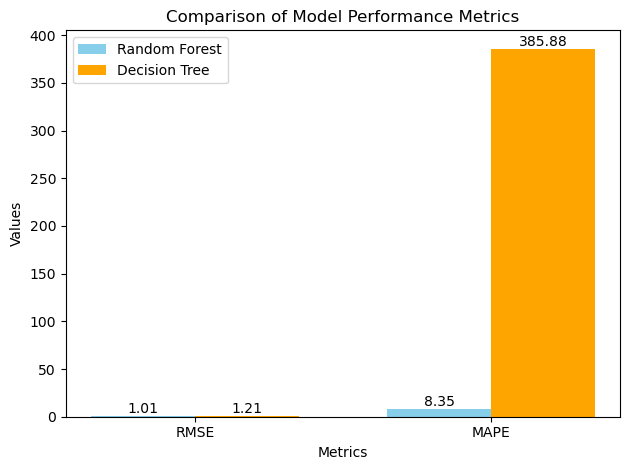

In [74]:
# visualisations on the above produced error metrics
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your computed values
rf_metrics = {'RMSE': 1.01, 'MAPE': 8.35}  #  actual values for Random Forest
dt_metrics = {'RMSE': 1.21, 'MAPE': 385.88}  # Replace with actual values for Decision Tree

# Extracting metric names and values
metrics = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
dt_values = list(dt_metrics.values())

# Bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, dt_values, width, label='Decision Tree', color='orange')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotating the bar values
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f')

plt.tight_layout()
plt.show()


## Random Forest Model:
RMSE (Root Mean Squared Error):

Value: 1.0181
Interpretation: This value represents how much error the model makes in its predictions on average. The lower the RMSE, the better the model's accuracy. A value of 1.0181 suggests the model performs relatively well, with a minor error in its predictions.

RSS (Residual Sum of Squares):
Value for the first row: 1823.239657, and for other rows it's 0.
Interpretation: RSS indicates the sum of the squares of residuals (errors) between predicted and actual values. The presence of a large value for the first row and 0s for the other rows indicates that the model is performing well for many instances, but there may be some outliers where residuals are larger.

MAPE (Mean Absolute Percentage Error):
Value: 8.3457
Interpretation: The MAPE value tells you the average percentage error in predictions. A lower MAPE value is better, with 8.35% being a relatively good error rate, especially when considering the scale of real-world predictions.

## Decision Tree Model:
RMSE (Root Mean Squared Error):

Value: 1.2172
Interpretation: This value is slightly higher than that of the Random Forest model, indicating that the Decision Tree has a slightly higher error in its predictions.

RSS (Residual Sum of Squares):
Value for the first row: 4467.000356, and for other rows it's 0.
Interpretation: The higher RSS in the first row (compared to the Random Forest model) indicates that the Decision Tree model has a larger residual error for some predictions. This may suggest that the model is not capturing some patterns as effectively as the Random Forest model.

MAPE (Mean Absolute Percentage Error):
Value: 385.8750
Interpretation: The very high MAPE value indicates that the Decision Tree model is making significantly worse predictions, on average, compared to the Random Forest model. It suggests that the Decision Tree is often making large prediction errors relative to the true values.

## Conclusion:
Random Forest is the better performing model, providing more accurate predictions and lower error rates.
Decision Tree could benefit from hyperparameter tuning or pruning to reduce overfitting and improve its generalization performance.

In [186]:
!pip install transformers